In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "C:\\datasets\\spe\\Renewable Energy\\01 renewable-share-energy.csv"
df = pd.read_csv(path)

In [19]:
# new_row = {'Year': 2023, 'Entity': 'World', 'Code': 'WORLD', 'Renewables (% equivalent primary energy)': 14.6}
# # add new row to the dataframe
# df.loc[len(df)] = new_row
df

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088
...,...,...,...,...
5599,World,OWID_WRL,2018,11.741059
5600,World,OWID_WRL,2019,12.237987
5601,World,OWID_WRL,2020,13.455194
5602,World,OWID_WRL,2021,13.470907


In [30]:
df

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088
...,...,...,...,...
5599,World,OWID_WRL,2018,11.741059
5600,World,OWID_WRL,2019,12.237987
5601,World,OWID_WRL,2020,13.455194
5602,World,OWID_WRL,2021,13.470907


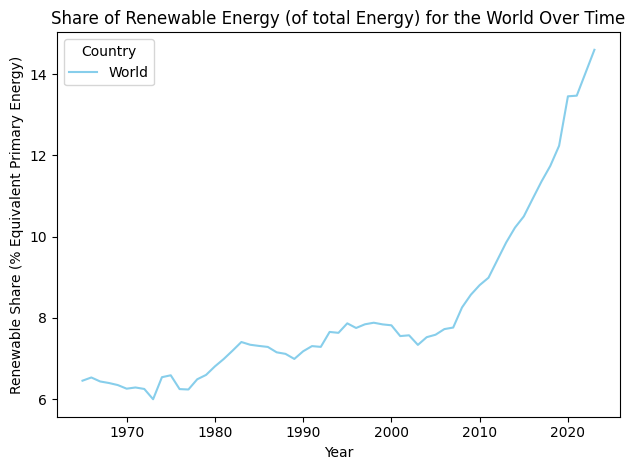

In [20]:
world_data = df[df['Entity'] == 'World']

# Plot the world renewable share over time with skyblue color
# plt.figure(figsize=(10,6))

plt.plot(world_data['Year'], world_data['Renewables (% equivalent primary energy)'], color='skyblue', label='World')

plt.title('Share of Renewable Energy (of total Energy) for the World Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Share (% Equivalent Primary Energy)')
# plt.ylim(0, 100)  # Setting the y-axis limits to a percentage scale (0 to 100%)
plt.legend(title='Country')
plt.tight_layout()
# plt.yscale('log')

# Display the plot
plt.show()

In [22]:
world_data.to_csv('world_renewable_share.csv', index=False)

c:\Users\sinaz\.conda\envs\test\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

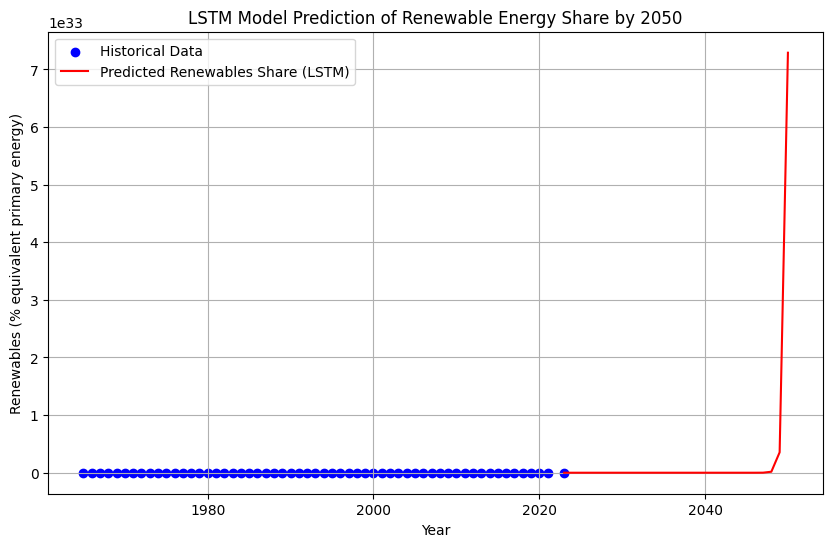

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lstm_model import model_creation  # Assuming your model is saved as lstm_model.py

# Load and preprocess the data
data = pd.read_csv('world_renewable_share.csv')

# Extract the year and renewables percentage columns
years = data['Year'].values.reshape(-1, 1)
renewables = data['Renewables (% equivalent primary energy)'].values.reshape(-1, 1)

# Scale the renewable energy data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_renewables = scaler.fit_transform(renewables)

# Create sequences for the LSTM model (time series data)
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 1  # How many previous time steps to consider for prediction
X, y = create_sequences(scaled_renewables, time_steps)

# Reshape X to be 3D as required by LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and compile the LSTM model
input_shape = (time_steps, 1)  # Time steps and number of features
model = model_creation()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Make predictions for future years (e.g., 2023 to 2050)
# Use the last available data point to predict future values
future_years = np.array(range(2023, 2051)).reshape(-1, 1)
X_future = np.array([scaled_renewables[-time_steps:]])  # Start with the last known value
future_predictions = []

for i in range(len(future_years)):
    pred = model.predict(X_future)
    future_predictions.append(pred[0][0])
    X_future = np.append(X_future[:, 1:, :], np.array([[[pred[0][0]]]]), axis=1)

# Inverse transform the predicted values back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], renewables, color='blue', label='Historical Data')
plt.plot(future_years, future_predictions, color='red', label='Predicted Renewables Share (LSTM)')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('LSTM Model Prediction of Renewable Energy Share by 2050')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from lstm_model import model_creation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def create_train_predict(model_df, name):
    model = model_creation()
    # split the data
    X = model_df['Year'].values
    y = model_df['CO2 Emission'].values

    Future_X = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

    all_X = np.concatenate((X, Future_X))

    scaler = MinMaxScaler()
    scaler2 = MinMaxScaler()
    scaler.fit(all_X.reshape(-1, 1))
    all_X = scaler.transform(all_X.reshape(-1, 1))
    X = scaler.transform(X.reshape(-1, 1))
    y = scaler2.fit_transform(y.reshape(-1, 1))
    Future_X = scaler.transform(Future_X.reshape(-1, 1))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # train the model without training logs
    model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
    print("finished training model")
    y_pred = model.predict(X)
    future_y_pred = model.predict(Future_X)

    # invert the scaling
    X_test_invert = scaler.inverse_transform(X)
    y_pred_invert = scaler2.inverse_transform(y_pred)
    X_invert = scaler.inverse_transform(X)
    y_invert = scaler2.inverse_transform(y)
    Future_X_invert = scaler.inverse_transform(Future_X)
    future_y_pred_invert = scaler2.inverse_transform(future_y_pred)
    print(future_y_pred_invert)
    # plot the results
    size = 10
    plt.figure(figsize=(10, 5))
    plt.plot(X_invert[size:], y_invert[size:], label='Actual Data', color='blue')
    plt.plot(X_test_invert[size:], y_pred_invert[size:], label='Model Prediction', color='green')
    plt.scatter(Future_X_invert, future_y_pred_invert, label='Future Prediction', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Annual CO2 emissions')
    plt.title(f'Annual CO2 emissions of {name}')
    plt.legend()
    plt.show()

df_list = [china_df]
name_list = ['World', 'Canada', 'USA', 'Europe', 'China']
name_list = ['World']
for i, each_df in enumerate(df_list):
    create_train_predict(each_df, name_list[i])